NCUMA 3A 106201011 Bo-Cyuan Lin

In [1]:
import numpy as np # To use the fundamental array operation
import myself_FFT as mFFT

## 1D-FFT (myself_FFT: FFT_1D)

In [2]:
data_1 = np.exp(2j * np.pi * np.arange(8) / 8)
data_1

array([ 1.00000000e+00+0.00000000e+00j,  7.07106781e-01+7.07106781e-01j,
        6.12323400e-17+1.00000000e+00j, -7.07106781e-01+7.07106781e-01j,
       -1.00000000e+00+1.22464680e-16j, -7.07106781e-01-7.07106781e-01j,
       -1.83697020e-16-1.00000000e+00j,  7.07106781e-01-7.07106781e-01j])

In [3]:
myResult_1 = mFFT.myself_FFT().FFT_1D(data_1)
myResult_1

array([-3.44509285e-16+1.2246468e-16j,  8.00000000e+00-6.8901857e-16j,
        3.44509285e-16+1.2246468e-16j,  0.00000000e+00+0.0000000e+00j,
        9.95799250e-17+1.2246468e-16j,  0.00000000e+00+1.9915985e-16j,
       -9.95799250e-17+1.2246468e-16j,  0.00000000e+00+0.0000000e+00j])

In [4]:
myResult_1_INV = mFFT.myself_FFT().FFT_1D_INV(myResult_1)
myResult_1_INV

array([ 1.00000000e+00-1.23259516e-32j,  7.07106781e-01+7.07106781e-01j,
        6.12323400e-17+1.00000000e+00j, -7.07106781e-01+7.07106781e-01j,
       -1.00000000e+00+1.22464680e-16j, -7.07106781e-01-7.07106781e-01j,
       -1.83697020e-16-1.00000000e+00j,  7.07106781e-01-7.07106781e-01j])

Data doesn't sastisfy the Radix-2.

In [5]:
data_2 = np.array([1,2,3,4,5,6], dtype='float64')
data_2

array([1., 2., 3., 4., 5., 6.])

In [6]:
myResult_2 = mFFT.myself_FFT().FFT_1D(mFFT.myself_FFT().Padding_1D(data_2))
myResult_2

array([21.        +0.j, -9.65685425-3.j,  3.        -4.j,  1.65685425+3.j,
       -3.        +0.j,  1.65685425-3.j,  3.        +4.j, -9.65685425+3.j])

In [7]:
myResult_2_INV = mFFT.myself_FFT().FFT_1D_INV(myResult_2)
myResult_2_INV

array([1.00000000e+00-0.00000000e+00j, 2.00000000e+00+4.97899625e-17j,
       3.00000000e+00-9.18485099e-17j, 4.00000000e+00-2.71834567e-16j,
       5.00000000e+00-0.00000000e+00j, 6.00000000e+00+4.97899625e-17j,
       0.00000000e+00+9.18485099e-17j, 2.22044605e-16+1.72254642e-16j])

In [8]:
myResult_2_INV = mFFT.myself_FFT().Delete_Padding_1D(myResult_2_INV, len(data_2))
abs(myResult_2_INV)

array([1., 2., 3., 4., 5., 6.])

## 2D-FFT (myself_FFT: FFT_2D)

In [9]:
Data_2D = np.array([[1,2,1],[2,1,2],[0,1,1]], dtype='float64')
Data_2D

array([[1., 2., 1.],
       [2., 1., 2.],
       [0., 1., 1.]])

In [10]:
myResult_2D, H, W = mFFT.myself_FFT().FFT_2D(Data_2D)
myResult_2D

array([[ 1.10000000e+01+0.j, -1.00000000e+00-4.j,  3.00000000e+00+0.j,
        -1.00000000e+00+4.j],
       [ 2.00000000e+00-5.j,  1.11022302e-16-1.j,  4.44089210e-16-3.j,
         2.00000000e+00+1.j],
       [ 1.00000000e+00+0.j, -1.00000000e+00-2.j, -3.00000000e+00+0.j,
        -1.00000000e+00+2.j],
       [ 2.00000000e+00+5.j,  2.00000000e+00-1.j, -1.11022302e-16+3.j,
         0.00000000e+00+1.j]])

In [11]:
myResult_2D_INV = mFFT.myself_FFT().FFT_2D_INV(myResult_2D, len(Data_2D), len(Data_2D[0]))
myResult_2D_INV

array([[1., 2., 1.],
       [2., 1., 2.],
       [0., 1., 1.]])

## Application on Image Processing (myself_FFT)

In [12]:
import matplotlib.pylab as plt # To show the image
import cv2 # To read the image

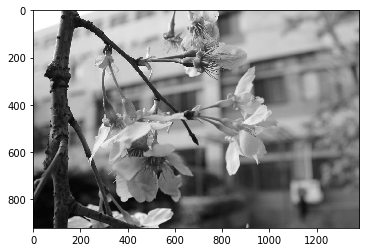

In [13]:
img = cv2.imread('demo_color.bmp', 0)
plt.imshow(img, 'gray')

## Low-Pass

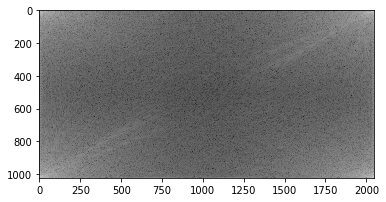

In [14]:
Fimg, H, W = mFFT.myself_FFT().FFT_2D(img)
plt.imshow(20*np.log(np.abs(Fimg)),'gray')

Centeralize the high frequency.

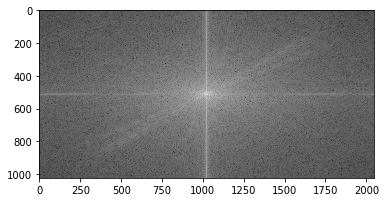

In [15]:
Fimg_switch = mFFT.myself_FFT().FFT_Shift(Fimg)
plt.imshow(20*np.log(np.abs(Fimg_switch)),'gray')

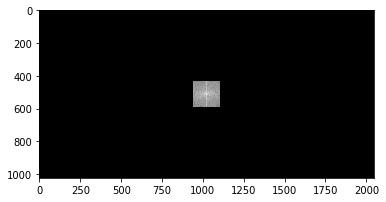

In [16]:
low = np.zeros((H, W), complex)
h, w = int(H/2), int(W/2)
d = 80
low[h-d:h+d, w-d:w+d] = Fimg_switch[h-d:h+d, w-d:w+d]
plt.imshow(20*np.log(np.abs(low+1)),'gray')

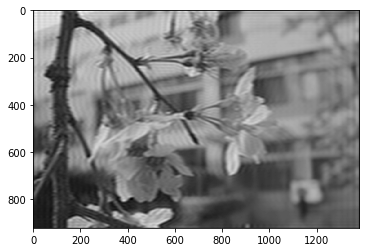

In [17]:
Fimg_switch = mFFT.myself_FFT().FFT_Shift(low)
Fimg_switch_INV = mFFT.myself_FFT().FFT_2D_INV(Fimg_switch, len(img), len(img[0]))
plt.imshow(Fimg_switch_INV, 'gray')

## High-Pass

Now we delete the $15 \times 15$ square with the center (512,1024)

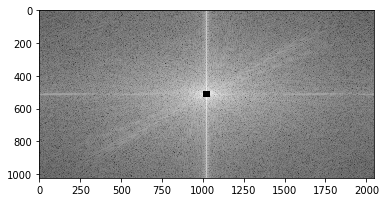

In [22]:
Fimg_switch = mFFT.myself_FFT().FFT_Shift(Fimg)

h, w = int(len(Fimg_switch)/2), int(len(Fimg_switch[0])/2)

d = 20

Fimg_switch[h-d:h+d, w-d:w+d] = 0

plt.imshow(20*np.log(np.abs(Fimg_switch+1)),'gray')

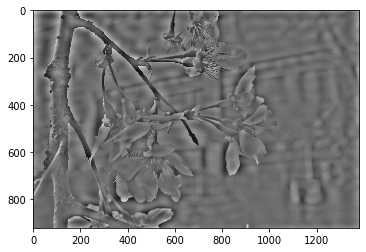

In [23]:
Fimg_switch = mFFT.myself_FFT().FFT_Shift(Fimg_switch)
Fimg_switch_INV = mFFT.myself_FFT().FFT_2D_INV(Fimg_switch, len(img), len(img[0]))
plt.imshow(Fimg_switch_INV, 'gray')